<a href="https://colab.research.google.com/github/tmogoa/compilerconstruction/blob/main/A_Labactivities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Stream ***Group members: 116814, 102401, 100226, 121544, 110195***


# **Lab 1: Flex, Bison, Lex, Yacc**

### Flex

Writing a compiler in a high-level programming language is a very complex task. But this can be achieved with the help of compiler writing tools such as **Flex**. 
**Flex** is a ***fast lexical analyser generator***---a tool for for programming that recognizes ***lexical patterns*** in the **input** with the help of ***Flex specifications***.
Flex specification contains two parts: (i) **patterns** and (ii) **corresponding action**. 

When you write a Flex specification, you create a set of **patterns** which the **lexer** matches against the **input**. Each time one of the **patterns** matches, the **corresponding action** part is invoked (which is a C code). In this way, a lex program divides the **input** into **tokens**.   
(Das, 2007)


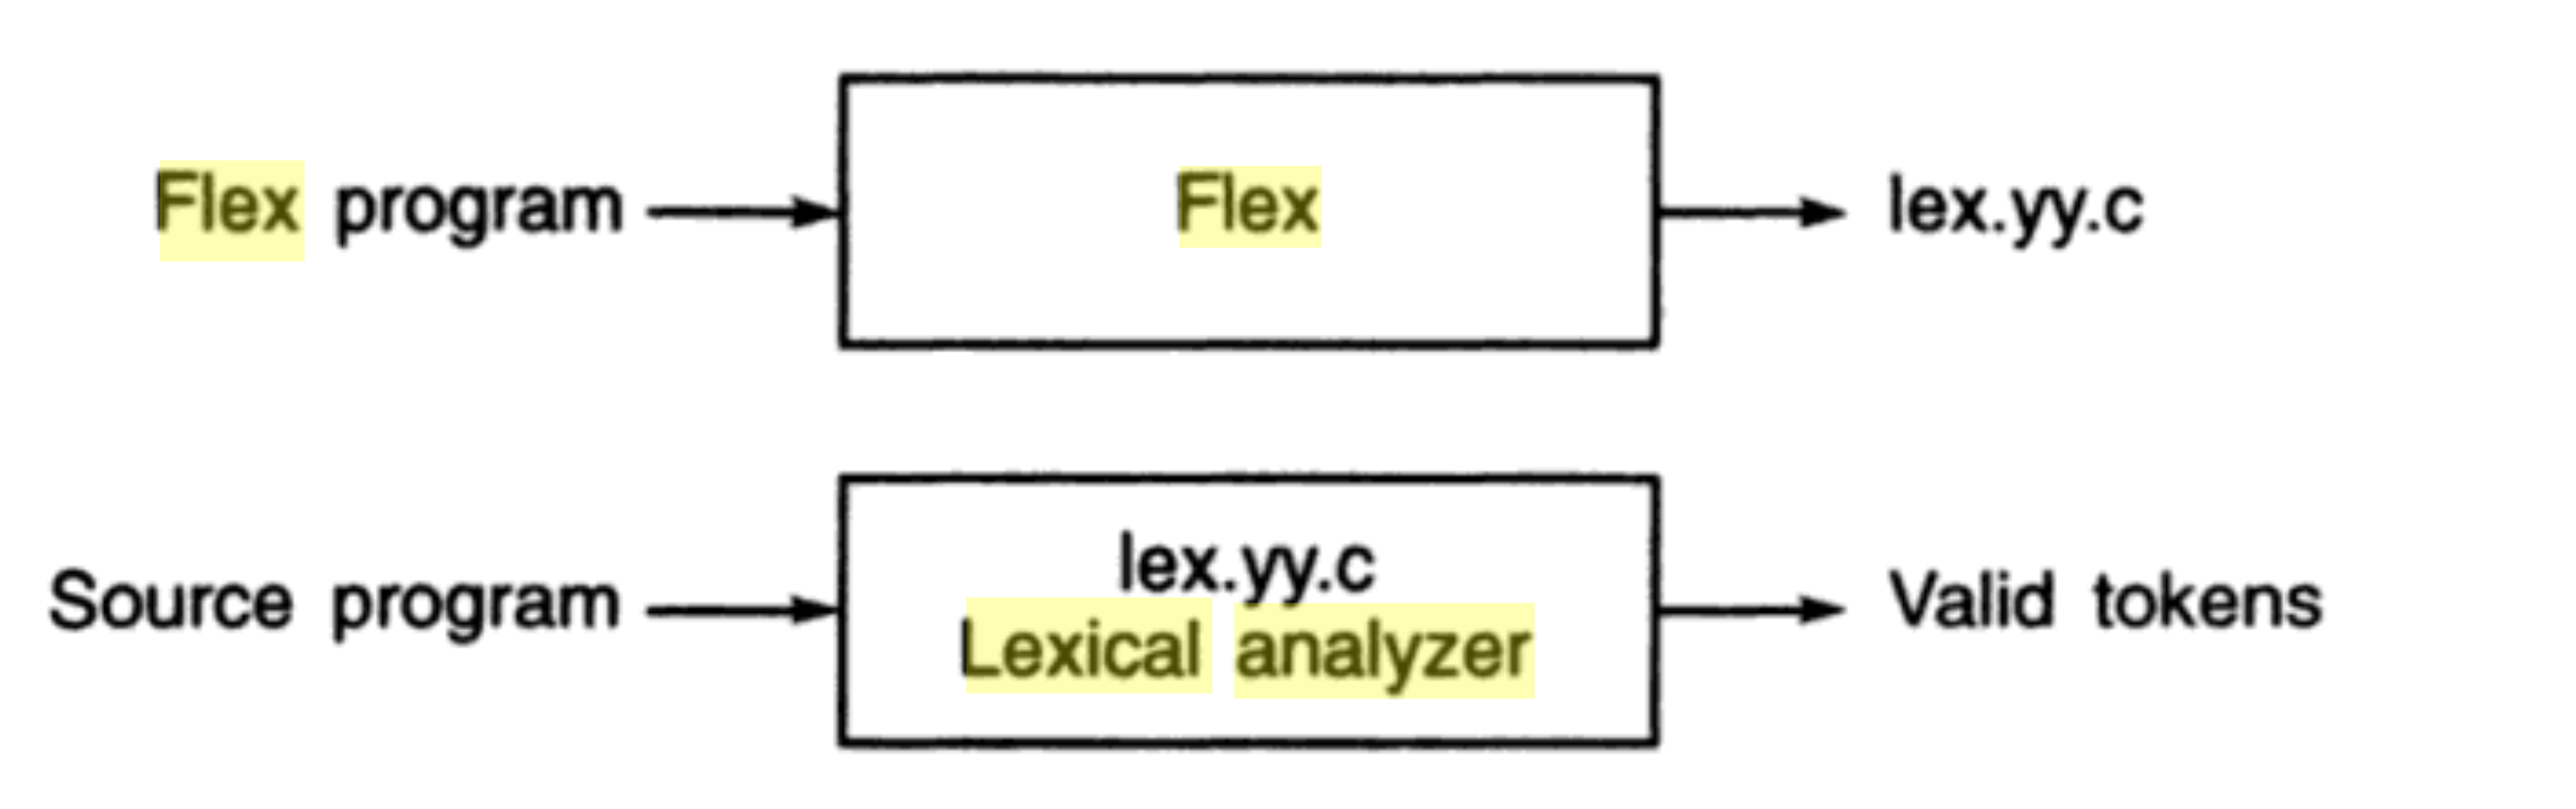

**Phases of a lexiacal Analyser (Das, 2007)**


Any Flex Program consists of three sectionsseperated by a line with just **%%** in it:


Definition section

%%

Rules Section

%%

User Auxilary Section








**Example Code: Count the number of characters in a string**


```
# This is formatted as code
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/
%{
int count = 0;
%}

/*** Rule Section has three rules, first rule
matches with capital letters, second rule
matches with any character except newline and
third rule does not take input after the enter***/
%%
[A-Z] {printf("%s capital letter\n", yytext);
	count++;}
.	 {printf("%s not a capital letter\n", yytext);}
\n {return 0;}
%%

/*** Code Section prints the number of
capital letter present in the given input***/
int yywrap(){}
int main(){

// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
		which contains the input*/
/* yylex() - this is the main flex function
		which runs the Rule Section*/
// yytext is the text in the buffer

// Uncomment the lines below
// to take input from file
// FILE *fp;
// char filename[50];
// printf("Enter the filename: \n");
// scanf("%s",filename);
// fp = fopen(filename,"r");
// yyin = fp;

yylex();
printf("\nNumber of Capital letters "
	"in the given input - %d\n", count);

return 0;
}

```



**Output**

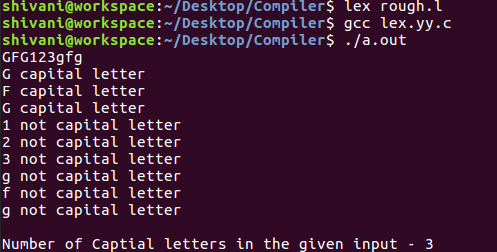


### Bison

Bison is a general purpose parser(syntatic analyzer) generator which is published as part of the GNU project. A syntax analyzer does the work of checking whether the stream of classified words produced by the scanner is a valid sentence is the programming langauge(Cooper & Torczon, 2011). Bison converts an annotated context-free grammar into a LR of generalized LR parser (GNU, 2021). *'LR'* refers to Left-to-right scanning Right-most derivation in reverse (Javatpoint, 2022). Additionally Bison is compatible with YACC, that is all correcly written YACC grammars can work with Bison (GNU, 2021). Bison is the GNU equivalent of YACC (MVPS.net, 2019).

The diagram below by Gao(2022) shows summary of how Bison works, how a parser is generated and how it is then compiled by a C compiler afterwhich in can be use to generate syntax trees.

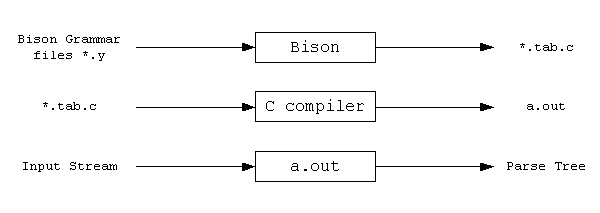

Below is a code snippet of a simple calculator program (Levine, 2009):

    /* simplest version of calculator */
    %{
    #include <stdio.h>
    %}

    /* declare tokens */
    %token NUMBER
    %token ADD SUB MUL DIV ABS
    %token EOL

    %%

    calclist: /* nothing */                       matches at beginning of input
    | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
    ;

    exp: factor       default $$ = $1 
    | exp ADD factor { $$ = $1 + $3; }
    | exp SUB factor { $$ = $1 - $3; }
    ;

    factor: term       default $$ = $1 
    | factor MUL term { $$ = $1 * $3; }
    | factor DIV term { $$ = $1 / $3; }
    ;

    term: NUMBER  default $$ = $1 
    | ABS term   { $$ = $2 >= 0? $2 : - $2; }
    ;
    %%
    main(int argc, char **argv)
    {
      yyparse();
    }

    yyerror(char *s)
    {
      fprintf(stderr, "error: %s\n", s);
    }


### YACC

**YACC**
Yet Another Compiler Compiler is a syntax analyzer (parser) generator. The input to YACC is a Context Free Grammar(CFG) and the output is the code of the parser. YACC is used to build lexical analyzers.
Given grammar rules:


*  S->E$

*   E->E+T

*   ->T

*  T->T*F
*   ->F


*   F->(E)


*   ->-F


*   ->NUM

The grammar rules above are for building a simple calculator.The YACC parser works from bottom to top and is accomplished by looking for segments that look like the right hand side of a particular production and reducing it back. So for example given the arithmetic( -3*4+5$)$ represents the end of input.
The following steps are to be followed when using YACC parser:










*   We begin from the -Ve symbol. YACC has a stack therefore the negative  symbol is shifted onto the stack then the look ahead token tells it what to do 

*    It shifts to 3 and adds it to the stack and now the look ahead token is the asterix.It will look at three and realize that it is a NUM and corresponds to production rule 8 and chooses to do a reduction as 3 matches the right hand ride production of rule 8 in which F->3

*   In the - section the - symbol is the same as -F
*  The production F can be reduced further into a T using production 3 and upon seeing the asterix it shifts the look ahead token to the number 4.
*  On the number 4 it executes a reduction using production rule 8.Therefore the production T*F can be replaced by the left hand side production T.

*  Production T can be extrapolated from the production rule 2 to give us E. Then the stack is shifted right to capture the next two operands + and 5


*   5 is going to get reduced based on production 7 to give us an F and based on production 3 F is going to be reduced back to a T.And finally to conclude we will use production rule 1 to reduce the production E$ to give us


*   
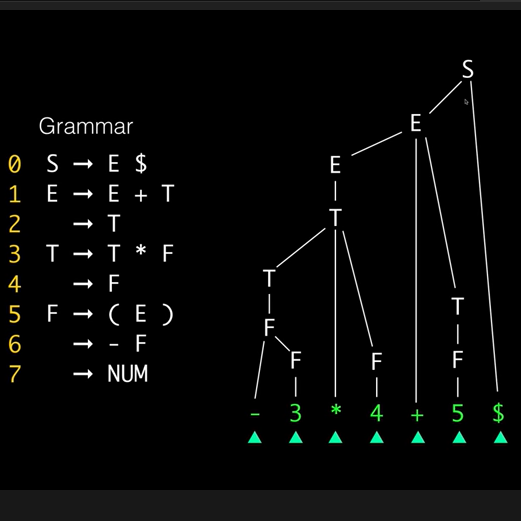

In [ ]:
%{
#include <stdio.h>
#include<stdlib.h>

extern int yylex();
Void yyerror(char *msg);
%}
%union{float f}
%token <f>NUM
%type<f> ETF
%%
S:E //no need for dollar sign as its immutable {printf(“%f\n”,$1);}
  ;
E:E ’+’ T  {$$=$1+$3;}
   |E ‘-’T    {$$=$1-$3;}
   |T          {$$=$1;}
   ;
T:T*F       {$$=$1*$3;}
  |E ‘/’T     {$$=$1/$3;}
  |F           {$$=$1}
  ;
F:’(‘E’)’    {$$=$2}
  |’-’F       {$$=-$1}
  |NUM    {$$=$1}
  ;

Void yyerror(char *msg){
    fprintf(stderr,”%s\n”,msg);
            exit(1);
}
Int main(){
     yyparse();
    return(0);
}

%%

On to the lexical analyzer

%{
#include <stdio.h>
#include<stdlib.h>
#include<y.tab.h> // generated via yacc -d


%}
%option noyywrap
%%
[0-9]+(\.[0-9]+)?([eE][0-9]+)?  {yyval.f = ato(yytext);return NUM}
[-+()*/]                    {return yytext[0];}
[\t\f\v\n]             {;}
%%


### Lex

Lex is a tool or software that automatically creates a lexical analyser (finite Automata). It takes LEX source program as input and produces lexical analyser as the output. Lexical analyser converts input string from the user, into tokens, as the output.

Lex is a program generator purposed for lexical processing of character input/output stream. In a program with an input-output structure, two tasks repeat multiple times. It can divide the input-output into meaningful units and then discovering the relationships among the units for C program (the units are variable names, constants, and strings) (the units are variable names, constants, and strings). Lexical analyzer, or LEXING, is the term for this grouping of words into units (referred to as tokens). By using a set of token descriptions as input, LEX creates a routine known as a lexical analyzer, also known as an LEXER or Scanner.

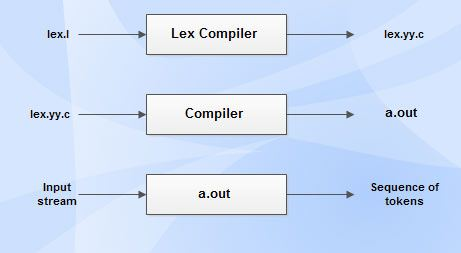



*   lex.l is an input file written in a language which specifies the creation of the lexical analyser. The lex compiler converts lex.l to a C program known as lex.yy.c

*   lex.yy.c is compiled by the C compiler to a file called a.out.

*   The output of the C compiler is the working lexical analyser which takes the input string and converts them into a series of tokens.

*   yylval is a global variable which is provided by lexical analyser and parser to return the name and an attribute value of the token. The attribute value can be numeric code, pointer to symbol table or null.


**Structure of Lex Programs**
Lex program will be in following form

declarations

%%

translation rules

%%

auxiliary functions


***Declarations*** 
This section includes declaration of variables, constants and regular definitions.

***Translation rules*** 
It contains regular expressions and code segments.

Form : Pattern {Action}

Pattern is a regular expression or regular definition.

Action refers to segments of code.

***Auxiliary functions*** 
This section holds additional functions which are used in actions. These functions are compiled separately and loaded with lexical analyzer.

Lexical analyzer produced by lex starts its process by reading one character at a time until a valid match for a pattern is found.

Once a match is found, the associated action takes place to produce token.

The token is then given to parser for further processing.



In [ ]:
//Code Snippet - Counting total number of tokens


%{

  int n = 0 ;

%}

// rule section

%%

//count number of keywords

"while"|"if"|"else" {n++;printf("\t keywords : %s", yytext);}


// count number of keywords

"int"|"float" {n++;printf("\t keywords : %s", yytext);}


// count number of identifiers

[a-zA-Z_][a-zA-Z0-9_]* {n++;printf("\t identifier : %s", yytext);}


// count number of operators

"<="|"=="|"="|"++"|"-"|"*"|"+" {n++;printf("\t operator : %s", yytext);}


// count number of separators

[(){}|, ;] {n++;printf("\t separator : %s", yytext);}


// count number of floats

[0-9]*"."[0-9]+ {n++;printf("\t float : %s", yytext);}


// count number of integers

[0-9]+ {n++;printf("\t integer : %s", yytext);}						


.         ;

%%


int main()

{
	
	yylex();
	
	printf("\n total no. of token = %d\n", n);
	
}

**Results**

Input: int p=0, d=1, c=2;

Output: total no. of tokens = 13

###***References***

1. https://www.gnu.org/software/bison/manual/bison.html#Introduction

2. https://www.mvps.net/docs/gnu-flex-and-gnu-bison/?gclid=Cj0KCQjw08aYBhDlARIsAA_gb0ffbLtKYZnJzLZK2e-h5vYq_KEuofSSnNiZMAKjXUazI5KPEOghmqoaAkNUEALw_wcB

3. https://www.javatpoint.com/lr-parser

4. Gao Lan, http://alumni.cs.ucr.edu/~lgao/teaching/bison.html

5. Levine, J. (2009). Flex & Bison: Text Processing Tools. " O'Reilly Media, Inc.".

6. Das, V. V. (2007). Compiler Design using FLEX and YACC. PHI Learning Pvt. Ltd..
7. https://ecomputernotes.com/compiler-design/lex-use-of-lex#Use_of_Lex
8. https://www.tutorialspoint.com/what-is-lex
9. Cooper, K. D., & Torczon, L. (2011). Engineering a compiler. Elsevier.

# **Lab 2: NFA TO DFA and Flex Lexical Analyzer**

### NFA TO DFA

### First Example

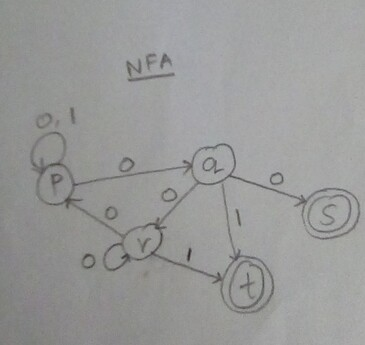

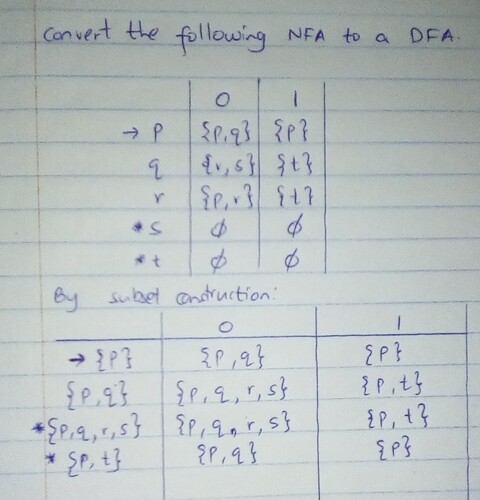

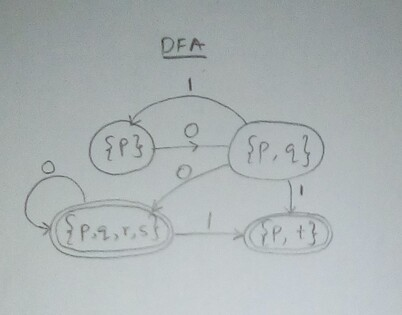

###Second Example

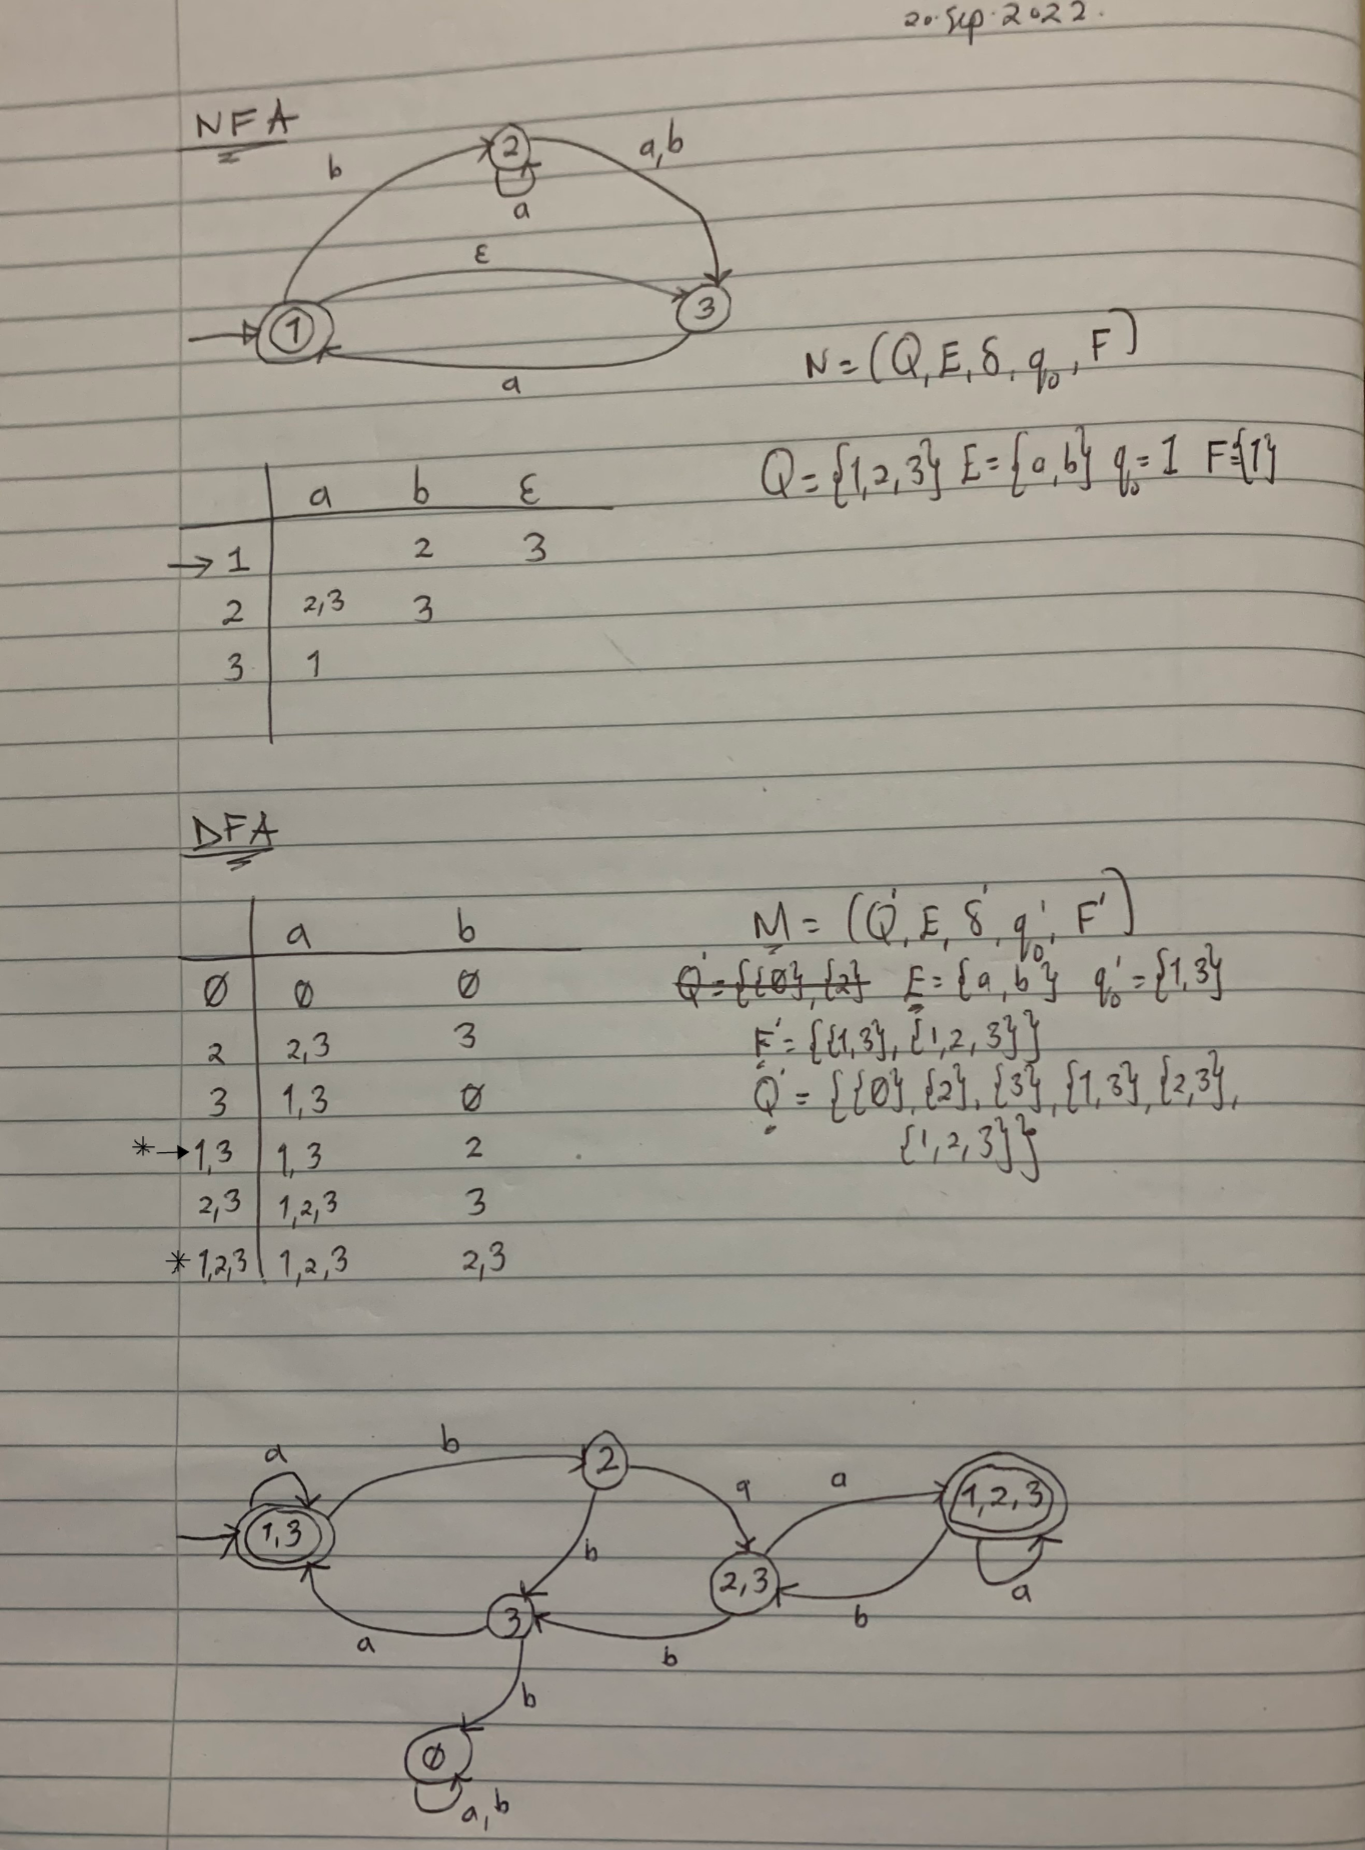

##Lexical Analyser - Password Acceptor

This program is set to take a string as an input. This string is treated as a password and undergoes defined checks to ensure the criteria is met to be tagged as a valid password. The criteria are:

1. The password should not have any symbols
2. The password should have atleast 1 Uppercase Alphabet
3. The password should have atleast 1 Lowercase Alphabet
4. The password should have atleast 1 Number
5. The password should have atleast length of 8 characters

In [ ]:
%{
int symb = 0;
int U_case = 0;
int L_case = 0;
int num = 0;
int len = 0;

%}
 
/*** Rule Section has five rules based on the following criteria that a password string must meet: 
The password should not have any symbols -> first rule matches with symbols using octal value of ASCII code and increases symbol counter and length counter , 
The password should have atleast 1 Uppercase Alphabet -> second rule matches with Uppercase Alphabets and increases the Uppercase counter and length counter,
The password should have atleast 1 Lowercase Alphabet -> third rule matches with Lowercase Alphabets and increases the Lowercase counter and length counter,
The password should have atleast 1 Number -> fourth rule matches with numbers and increases number counter and length counter
The password should have atleast length of 8 characters -> length counter keeps track of each character captured
fifth rule returns 0 when a new line is captured to ensure password is a single line string***/
%%
[\040-\057\072-\100\133-\140\173-\176] {symb++; len++;}
[A-Z] {U_case++; len++;}
[a-z] {L_case++; len++;}
[0-9] {num++; len++;}
\n {return 0;}

%%
 
/*** Code Section prints whether the password is valid or not based on above listed criteria***/
int yywrap(){}
int main(){
printf("\n\n\n****************PASSWORD ACCEPTOR****************\n\n\n");
printf("A Valid Password must match the following criteria:\n\n");
printf("1. The password should not have any symbols\n");
printf("2. The password should have atleast 1 Uppercase Alphabet\n");
printf("3. The password should have atleast 1 Lowercase Alphabet\n");
printf("4. The password should have atleast 1 Number\n");
printf("5. The password should have atleast length of 8 characters\n\n");
printf("Input Password: ");
  
yylex();

/*** This if statement checks if our criteria is met by the input string i.e 
there is no symbol -> symb counter should be 0
there is atleast 1 Lowercase alphabet -> L_case >=1
there is atleast 1 Uppercase alphabet -> U_case >=1
there is atleast 1 number -> num >=1
the length of the password is atleast 8 characters -> len >=8***/
if(symb==0 && L_case>=1 && U_case>=1 && num>=1 && len>=8){
      printf("\nThis password is Valid!\n");
 
}
else{
      printf("\nThis password in NOT Valid!\n");
}

 
return 0;
}


# **Lab 3 - Creating Our Own Flex File**

**Lab was done as Lab 2. Thank you.**